<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/2DHeatEquation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2D Simulation : (Heat/Pressure Distribution)

$\frac{\partial U}{\partial t} = D\left(\frac{\partial^2U}{\partial x^2} + \frac{\partial^2U}{\partial y^2}\right)$

> This is the governing PDE where  D is the diffusion coefficient



##Applying Finite Difference Approximations.

$\frac{u_{i,j}^{(n+1)} - u_{i,j}^{(n)}}{\Delta t} = D\left[ \frac{u_{i+1,j}^{(n)} - 2u_{i,j}^{(n)} + u_{i-1,j}^{(n)}}{(\Delta x)^2} + \frac{u_{i,j+1}^{(n)} - 2u_{i,j}^{(n)} + u_{i,j-1}^{(n)}}{(\Delta y)^2} \right],$

$u_{i,j}^{(n+1)} = u_{i,j}^{(n)} + D\Delta t\left[ \frac{u_{i+1,j}^{(n)} - 2u_{i,j}^{(n)} + u_{i-1,j}^{(n)}}{(\Delta x)^2} + \frac{u_{i,j+1}^{(n)} - 2u_{i,j}^{(n)} + u_{i,j-1}^{(n)}}{(\Delta y)^2} \right]$

#Problem Statement:

Consider the diffusion equation applied to a metal plate initially at temperature Tcold apart from a disc of a specified size which is at temperature Thot. We suppose that the edges of the plate are held fixed at Tcool. The following code applies the above formula to follow the evolution of the temperature of the plate. It can be shown that the maximum time step, Δt that we can allow without the process becoming unstable is

$\Delta t = \frac{1}{2D}\frac{(\Delta x\Delta y)^2}{(\Delta x)^2 + (\Delta y)^2}$

Approach 1: Loops.(SLOW)

##Approach 2: Vectorization (FAST)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
plt.figure(figsize=(10,10))
plt.style.use('default')

<Figure size 720x720 with 0 Axes>

0 1
10 2
50 3
100 4


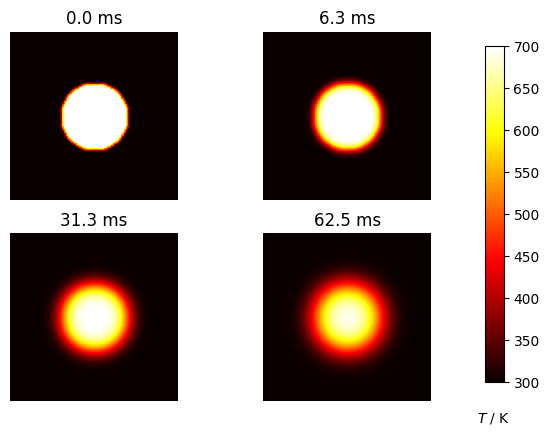

In [6]:
# plate size, mm
w = h = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.1
# Thermal diffusivity of steel, mm2.s-1
D = 4.


Tcool, Thot = 300, 700

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = u0.copy()

# Initial conditions - ring of inner radius r, width dr centred at (cx,cy) (mm)
r, cx, cy = 2, 5, 5
r2 = r**2


for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 101
# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure()
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=Tcool,vmax=Thot)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*1000))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()